Pregunta 2 - Hineill David Céspedes Espinoza

Diseño de filtros digitales

Se desea diseñar filtros pasabajos para aplicaciones de radar. Considere que contamos con un
sistema de recepción de señales de radar basado en un dispositivo SDR (Software Defined Radio)
que adquiere datos con una velocidad de muestreo de 100 MHz. La señal digitalizada pasa por
un demodulador para llevar la señal a banda base, por un filtro pasabajos y por un decimador
para reducir la tasa de muestreo a 1 MHz. Por ende, la frecuencia de corte del filtro a diseñar
también debe ser de 1 MHz

1. _ Se desea realizar el diseño aplicando la técnica de enventanado, utilizando una ventana
de tipo Kaiser (revisar Cap. 10 de Manolakis & Ingle, 2011). Para ello considere que la
atenuación en la banda de rechazo es de 60 dB. Además, seleccione la longitud del filtro
tal que la banda de transición sea como máximo el 10% de la frecuencia de muestreo luego
de la decimación.

In [1]:
#Diseñamos el filtro Kaiser usando las librerías 
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
from scipy import signal

# --- Parámetros básicos del filtro ---
sampling_frequency = 100e6  # Frecuencia de muestreo en Hz (100 MHz)
nyquist_frequency = sampling_frequency / 2  # Frecuencia de Nyquist (50 MHz)
cutoff_frequency = 1e6  # Frecuencia de corte en Hz (1 MHz)
transition_bandwidth = 0.08 * cutoff_frequency  # Banda de transición (80 kHz)
stopband_attenuation = 80  # Atenuación deseada en la banda de rechazo (80 dB)

# --- Cálculo de parámetros para la ventana Kaiser ---
attenuation_in_db = stopband_attenuation  # Guardar la atenuación deseada en dB
normalized_transition_bandwidth = (transition_bandwidth * np.pi) / nyquist_frequency  # Ancho de la banda en radianes

# Calcular el parámetro beta de la ventana Kaiser basado en la atenuación
kaiser_beta = signal.kaiser_beta(attenuation_in_db)

# --- Calcular el orden del filtro ---
# Fórmula del orden del filtro FIR utilizando la aproximación de Kaiser
filter_order = int((attenuation_in_db - 8) / (2.285 * normalized_transition_bandwidth))

# Ajustar el orden para que sea impar (necesario para un filtro FIR simétrico)
if filter_order % 2 == 0:
    filter_order += 1

# --- Diseño del filtro FIR utilizando la ventana Kaiser ---
# Generar los coeficientes del filtro con la función firwin
fir_coefficients = signal.firwin(
    filter_order,  # Orden del filtro calculado
    cutoff_frequency / nyquist_frequency,  # Frecuencia de corte normalizada
    window=('kaiser', kaiser_beta),  # Usar la ventana Kaiser con el parámetro beta
    pass_zero=True  # Especifica que es un filtro pasa-bajas
)

# --- Calcular la respuesta en frecuencia del filtro ---
# freqz calcula las frecuencias y las magnitudes de la respuesta del filtro
frequencies, frequency_response = signal.freqz(
    fir_coefficients,  # Coeficientes del filtro
    worN=8000  # Número de puntos en el eje de frecuencia para mayor resolución
)

# --- Explicación detallada de las variables ---
# sampling_frequency: Frecuencia de muestreo del sistema (Hz).
# nyquist_frequency: Frecuencia máxima representable (fs / 2).
# cutoff_frequency: Frecuencia donde el filtro pasa de la banda pasante a la de rechazo.
# transition_bandwidth: Rango de frecuencia en el cual el filtro cambia gradualmente de la banda pasante a la de rechazo.
# stopband_attenuation: Atenuación mínima deseada en la banda de rechazo (en dB).
# kaiser_beta: Parámetro de la ventana Kaiser basado en la atenuación especificada.
# filter_order: Orden del filtro FIR calculado según la fórmula de Kaiser.
# fir_coefficients: Coeficientes del filtro FIR diseñado.
# frequencies: Frecuencias normalizadas para evaluar la respuesta del filtro.
# frequency_response: Magnitud de la respuesta en frecuencia del filtro.

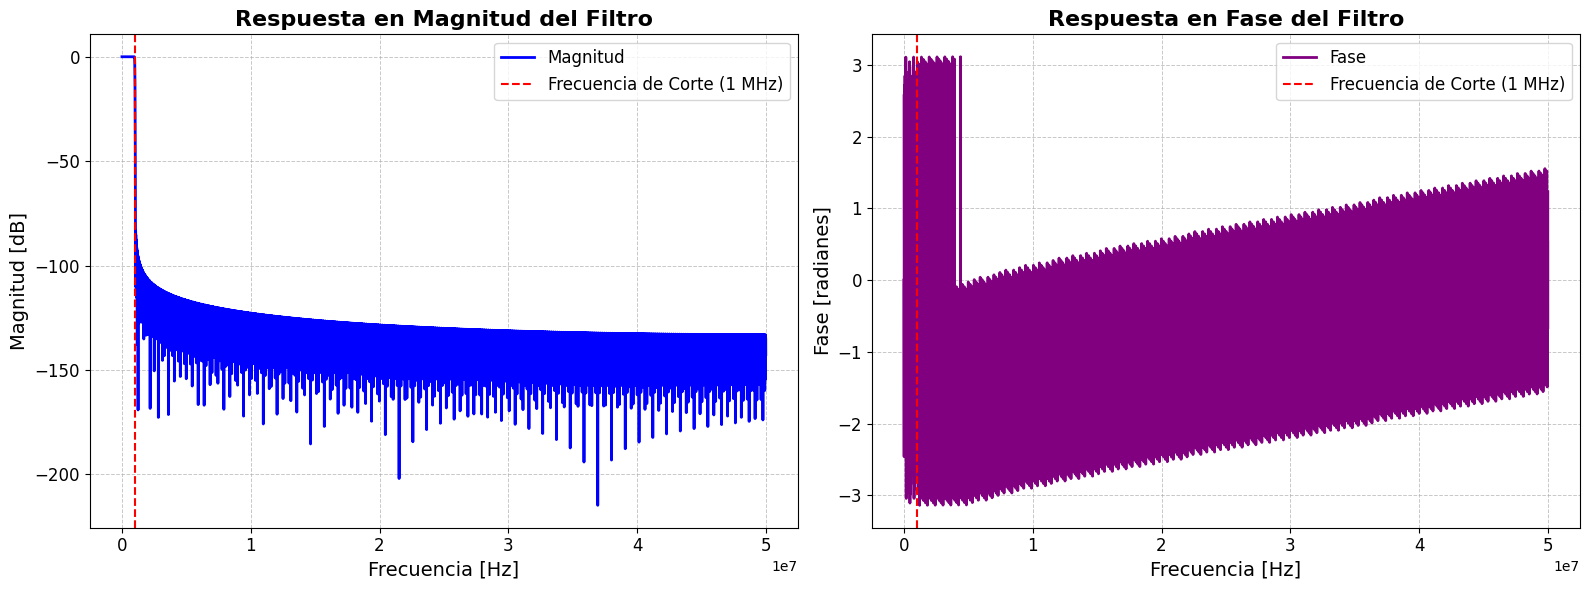

In [4]:
frequencies_hz = frequencies * nyquist_frequency / np.pi  # Convertir a Hz
magnitude_response = 20 * np.log10(np.abs(frequency_response))  # Magnitud en dB
phase_response = np.angle(frequency_response)  # Fase en radianes

# --- Graficar la respuesta en frecuencia ---
plt.figure(figsize=(16, 6))  # Tamaño de la figura

# Gráfico de Magnitud
plt.subplot(1, 2, 1)  # Primera gráfica (1 fila, 2 columnas, posición 1)
plt.plot(frequencies_hz, magnitude_response, color='blue', linewidth=2, label='Magnitud')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Magnitud del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Magnitud [dB]", fontsize=14)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Gráfico de Fase
plt.subplot(1, 2, 2)  # Segunda gráfica (1 fila, 2 columnas, posición 2)
plt.plot(frequencies_hz, phase_response, color='purple', linewidth=2, label='Fase')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Fase del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Fase [radianes]", fontsize=14)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste del diseño general
plt.tight_layout()
plt.show()

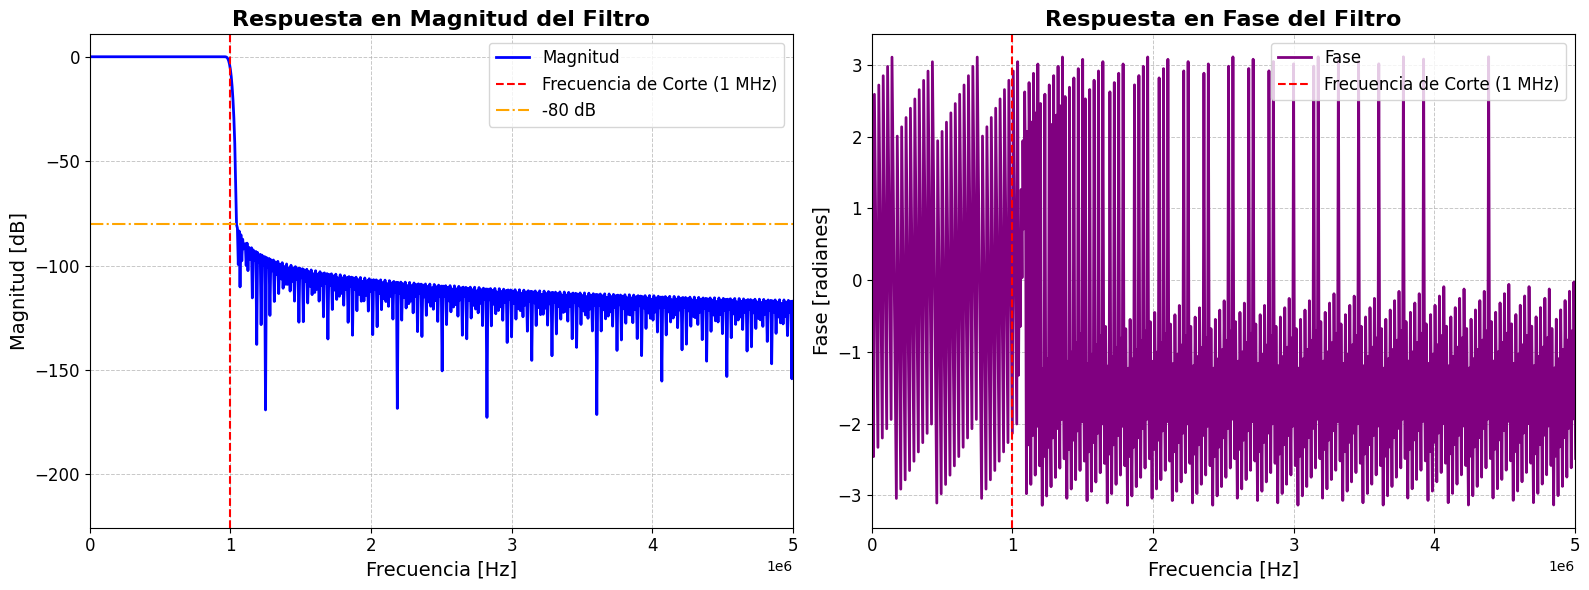

In [28]:
#Ajustamos para q se vean mejor las gráficas 
# --- Graficar la respuesta en frecuencia ---
plt.figure(figsize=(16, 6))  # Tamaño de la figura

# Gráfico de Magnitud
plt.subplot(1, 2, 1)  # Primera gráfica (1 fila, 2 columnas, posición 1)
plt.plot(frequencies_hz, magnitude_response, color='blue', linewidth=2, label='Magnitud')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Magnitud del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Magnitud [dB]", fontsize=14)
plt.axhline(
    y=-80, 
    color='orange', 
    linestyle='-.', 
    linewidth=1.5, 
    label='-80 dB'
)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlim([ 0 ,0.5* 1e7])
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Gráfico de Fase
plt.subplot(1, 2, 2)  # Segunda gráfica (1 fila, 2 columnas, posición 2)
plt.plot(frequencies_hz, phase_response, color='purple', linewidth=2, label='Fase')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Fase del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Fase [radianes]", fontsize=14)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.xlim([ 0 ,0.5* 1e7])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste del diseño general
plt.tight_layout()
plt.show()

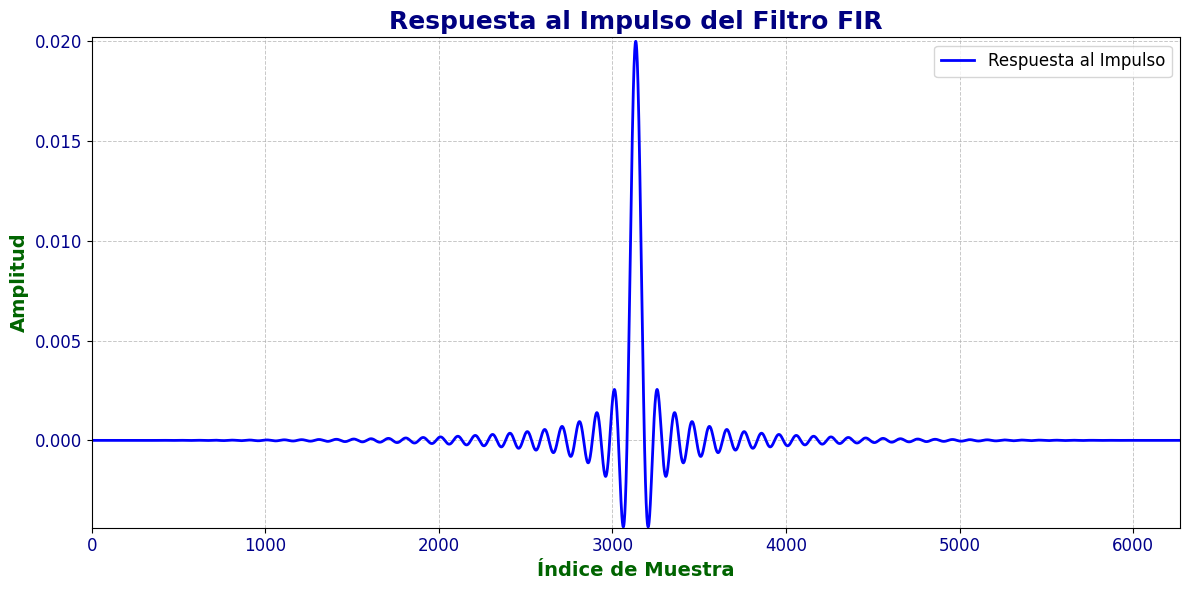

In [ ]:
# --- Gráfica de la respuesta al impulso ---
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

# Gráfico con plt.plot
plt.plot(
    fir_coefficients, 
    color='blue', 
    linewidth=2, 
    label='Respuesta al Impulso'
)

# Personalización del gráfico
plt.title("Respuesta al Impulso del Filtro FIR", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Índice de Muestra", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Amplitud", fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)  # Cuadrícula personalizada
plt.ylim([np.min(fir_coefficients) *1.01, np.max(fir_coefficients) *1.01])  # Ajustar límites en Y
plt.xlim([0, len(fir_coefficients)])  # Ajustar límites en X
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Añadir leyenda
plt.legend(fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

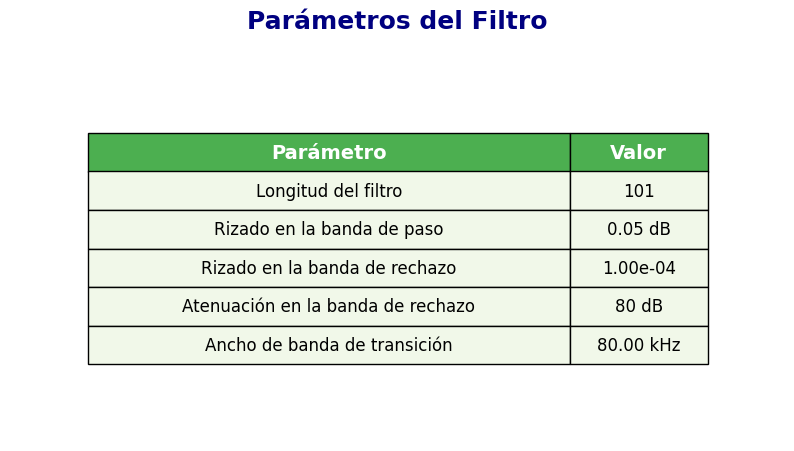

In [30]:
import matplotlib.pyplot as plt

# Parámetros simulados
N = 101  # Longitud del filtro
rizado_bp = 0.05  # Rizado en la banda de paso (en dB)
delta_s = 10**(-80 / 20)  # Atenuación en la banda de rechazo (como factor)
A = 80  # Atenuación en dB
transition_width = 80e3  # Ancho de banda de transición (en Hz)

# Datos para la tabla
column_labels = ["Parámetro", "Valor"]
table_data = [
    ["Longitud del filtro", f"{N}"],
    ["Rizado en la banda de paso", f"{rizado_bp:.2f} dB"],
    ["Rizado en la banda de rechazo", f"{delta_s:.2e}"],
    ["Atenuación en la banda de rechazo", f"{A} dB"],
    ["Ancho de banda de transición", f"{transition_width/1e3:.2f} kHz"]
]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')  # Ocultar ejes

# Dibujar la tabla
table = ax.table(
    cellText=table_data, 
    colLabels=column_labels, 
    loc='center', 
    cellLoc='center', 
    colLoc='center',
    bbox=[0.1, 0.2, 0.8, 0.6]  # Posición [izq, abajo, ancho, alto]
)

# Personalizar colores y bordes
table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(column_labels))))  # Ajustar ancho automáticamente

# Personalizar encabezados
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Encabezados (fila 0)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')  # Verde oscuro elegante
        cell.set_edgecolor('black')
    else:  # Celdas normales
        cell.set_fontsize(12)
        cell.set_facecolor('#F1F8E9')  # Verde claro para celdas
        cell.set_edgecolor('black')

# Añadir título
plt.title("Parámetros del Filtro", fontsize=18, fontweight='bold', color='navy', pad=20)

# Mostrar la tabla
plt.show()


2._ Usar Tecnica CIC

C:\Users\Hineill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


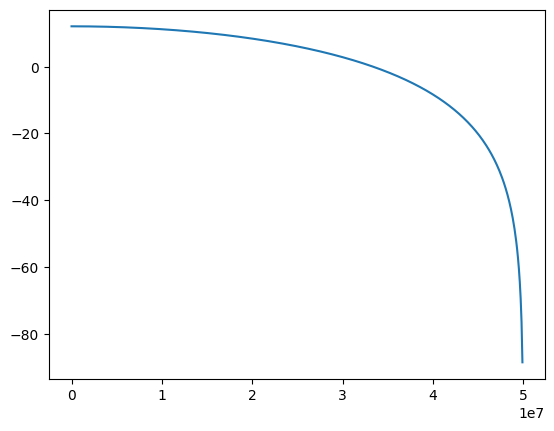

In [36]:
from scipy.signal import firwin, freqz
from scipy.signal import lfilter
fs = 100e6  # Frecuencia de muestreo (100 MHz)
nyquist = fs / 2
dirac = np.zeros(10000)
dirac [0]  =1 
y_coe  = [1 , -1]
x_coe  = [1 , 0, -1]
w  , h  = freqz(lfilter(x_coe , y_coe ,  dirac ) , fs=fs)
h = h**2
plt.plot(w,20*np.log10(h) )


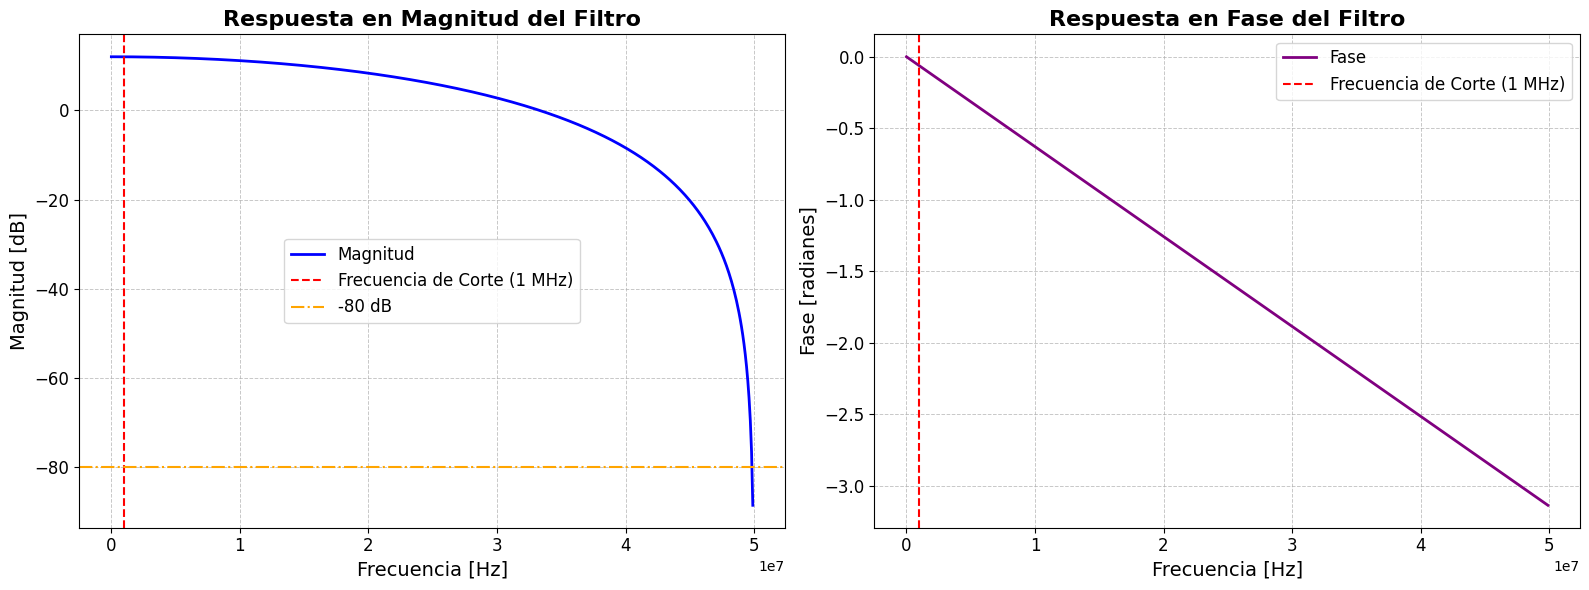

In [38]:
#Ajustamos para q se vean mejor las gráficas 
# --- Graficar la respuesta en frecuencia ---
plt.figure(figsize=(16, 6))  # Tamaño de la figura

# Gráfico de Magnitud
plt.subplot(1, 2, 1)  # Primera gráfica (1 fila, 2 columnas, posición 1)
plt.plot(w,20*np.log10(np.abs(h)) , color='blue', linewidth=2, label='Magnitud')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Magnitud del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Magnitud [dB]", fontsize=14)
plt.axhline(
    y=-80, 
    color='orange', 
    linestyle='-.', 
    linewidth=1.5, 
    label='-80 dB'
)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Gráfico de Fase
plt.subplot(1, 2, 2)  # Segunda gráfica (1 fila, 2 columnas, posición 2)
plt.plot(w, np.angle(h), color='purple', linewidth=2, label='Fase')
plt.axvline(cutoff_frequency, color='red', linestyle='--', linewidth=1.5, label='Frecuencia de Corte (1 MHz)')
plt.title("Respuesta en Fase del Filtro", fontsize=16, fontweight='bold')
plt.xlabel("Frecuencia [Hz]", fontsize=14)
plt.ylabel("Fase [radianes]", fontsize=14)
plt.grid(which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuste del diseño general
plt.tight_layout()
plt.show()